## Observations and Insights 

1. We can see from the box plot that drugs "Capomulin", "Ramicane" are most effective as they resulted in lower max tumour volume in mice



2. By analysing the line chart, we can see that tumour volume decreased over days when a mouse is treated with "Capomulin".




3. We can see a strong correlation between Average tumour volume and mouse weight when treated with Capomulin.From looking at the scatter plot and correlation of 0.8419363424694721 can explain that mouse weight increases based on upward trend in average tumour volume identified in the mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pymaceuticals_data = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

Pymaceuticals_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Pymaceuticals_data["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_g989 = Pymaceuticals_data.loc[(Pymaceuticals_data['Mouse ID'] == 'g989')] 
duplicate_g989 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#testing other mouse ID with more than one occurance

#duplicate_k403  = Pymaceuticals_data.loc[(Pymaceuticals_data['Mouse ID'] == 'k403')] 
#duplicate_k403 

#duplicate_j365  = Pymaceuticals_data.loc[(Pymaceuticals_data['Mouse ID'] == 'j365')] 
#duplicate_j365

#duplicate_j984 = Pymaceuticals_data.loc[(Pymaceuticals_data['Mouse ID'] == 'j984')] 
#duplicate_j984 

#duplicate_k210 = Pymaceuticals_data.loc[(Pymaceuticals_data['Mouse ID'] == 'k210')]
#duplicate_k210

length1 = len(Pymaceuticals_data)
length1

1893

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_Pymaceuticals_data = Pymaceuticals_data.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)

new_Pymaceuticals_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.

new_Pymaceuticals_data["Mouse ID"].value_counts()

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug_regimen = new_Pymaceuticals_data.groupby("Drug Regimen")

tumour_mean = grouped_drug_regimen['Tumour Volume (mm3)'].mean()

tumour_median = grouped_drug_regimen['Tumour Volume (mm3)'].median()

tumour_variance = grouped_drug_regimen['Tumour Volume (mm3)'].var()

tumour_std = grouped_drug_regimen['Tumour Volume (mm3)'].std()

tumour_SEM = grouped_drug_regimen['Tumour Volume (mm3)'].sem()


summary_regimen = pd.DataFrame({"Mean": round(tumour_mean,2),
                              "Median": round(tumour_median,2),
                              "Variance": round(tumour_variance,2),
                               "STD": round(tumour_std,2), 
                                "SEM": round(tumour_SEM,2)})

summary_regimen

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Timepoints for Each Treatment Regimen')

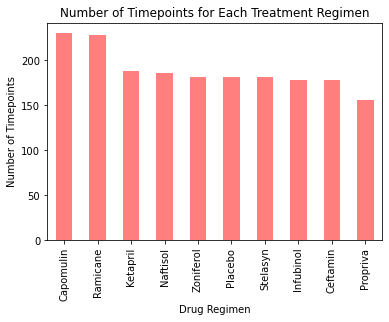

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = new_Pymaceuticals_data["Drug Regimen"].value_counts().plot.bar(alpha=0.5, color='r', align="center")

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Timepoints")
bar_plot.set_title("Number of Timepoints for Each Treatment Regimen")


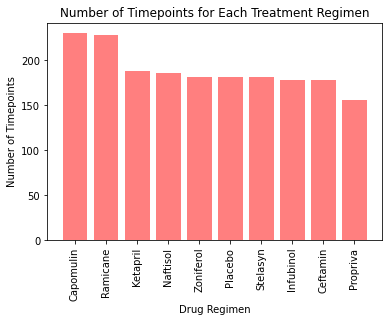

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#calculate timepoints for each regimen
counts_regimen = new_Pymaceuticals_data["Drug Regimen"].value_counts()

# Set the x_axis to the length of the 'counts_regimen' series
x_axis = np.arange(len(counts_regimen))

# Create a bar chart based upon the above data
plt.bar(x_axis, counts_regimen,alpha=0.5, color='r', align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,counts_regimen.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for Each Treatment Regimen")

plt.show()

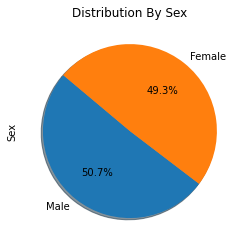

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
gender_mice = new_Pymaceuticals_data["Sex"].value_counts()

#create pie chart using pandas
pie_plot = gender_mice.plot.pie(autopct="%1.1f%%", shadow=True, startangle=140,title='Distribution By Sex')



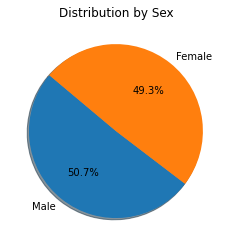

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
gender_mice = new_Pymaceuticals_data["Sex"].value_counts()

#create pie chart using pyplot
plt.pie(gender_mice,labels = gender_mice .index.values, autopct="%1.1f%%", shadow=True, startangle=140)

# Set title for chart
plt.title('Distribution by Sex')

plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(new_Pymaceuticals_data.groupby('Mouse ID')['Timepoint'].max())
last_timepoint


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

merged_new_last_timepoint= pd.merge(new_Pymaceuticals_data, last_timepoint, on=['Mouse ID',"Timepoint"],how = "right")
merged_new_last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumour vol data (for plotting)
tumour_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for r in regimens_list:
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    tumour_volume = merged_new_last_timepoint[merged_new_last_timepoint["Drug Regimen"]==r]["Tumour Volume (mm3)"]
    # add subset 
    tumour_volume_list.append(tumour_volume)
    
    # Determine outliers using upper and lower bounds
    Q3 = np.quantile(tumour_volume, 0.75)
    Q1 = np.quantile(tumour_volume, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #print(lower_range,upper_range)
    
    outlier_df = tumour_volume.loc[(tumour_volume>upper_range)|
                                           (tumour_volume<lower_range)]
 
    print(outlier_df)

Series([], Name: Tumour Volume (mm3), dtype: float64)
Series([], Name: Tumour Volume (mm3), dtype: float64)
31    36.321346
Name: Tumour Volume (mm3), dtype: float64
Series([], Name: Tumour Volume (mm3), dtype: float64)


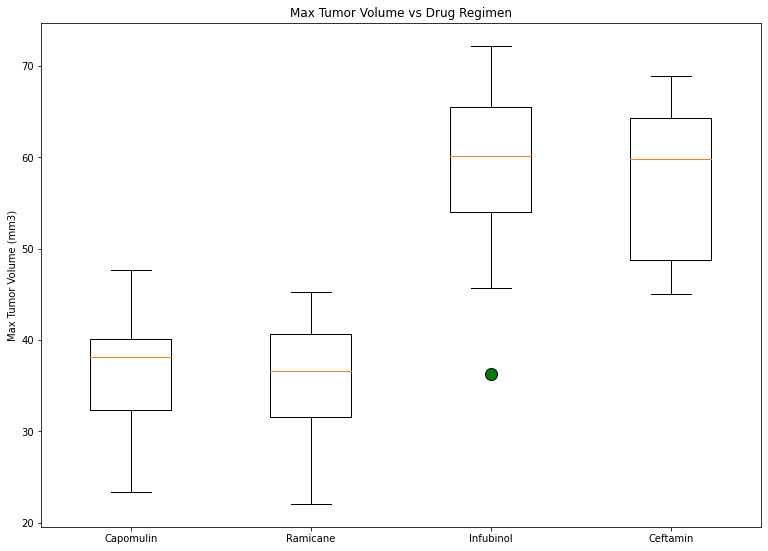

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(tumour_volume_list,labels =["Capomulin", "Ramicane", "Infubinol","Ceftamin"],flierprops = flierprops)

plt.title('Max Tumor Volume vs Drug Regimen')
plt.ylabel('Max Tumor Volume (mm3)')
# show plot
plt.show()

## Line and Scatter Plots

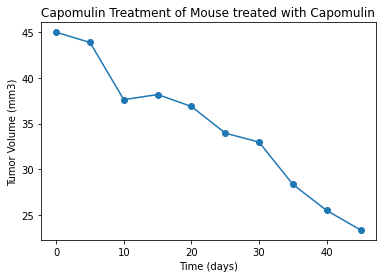

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

mouse_capomulin=  new_Pymaceuticals_data.loc[(new_Pymaceuticals_data['Drug Regimen'] == 'Capomulin')&
                                            (new_Pymaceuticals_data['Mouse ID'] == 's185')]

plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumour Volume (mm3)'], marker = 'o')


plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse treated with Capomulin")

plt.show()


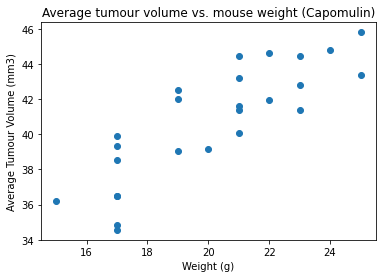

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

mouse_capomulin = new_Pymaceuticals_data.loc[new_Pymaceuticals_data['Drug Regimen'] == 'Capomulin']

mouse_cap_avg = mouse_capomulin.groupby(['Mouse ID']).mean()

plt.scatter(mouse_cap_avg['Weight (g)'],mouse_cap_avg ['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title("Average tumour volume vs. mouse weight (Capomulin)")

plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen


In [19]:
mouse_capomulin.corr()

,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Age_months,1.000000,-0.169172,-0.057964,-0.021604,0.006748
Weight (g),-0.169172,1.000000,-0.035271,0.525700,-0.119149
Timepoint,-0.057964,-0.035271,1.000000,-0.584271,0.584006
Tumour Volume (mm3),-0.021604,0.525700,-0.584271,1.000000,-0.313092
Metastatic Sites,0.006748,-0.119149,0.584006,-0.313092,1.000000


In [20]:
st.pearsonr(mouse_cap_avg['Weight (g)'],mouse_cap_avg ['Tumour Volume (mm3)'])[0]
correlation = st.pearsonr(mouse_cap_avg['Weight (g)'],mouse_cap_avg ['Tumour Volume (mm3)'])[0]
correlation 

0.8419363424694721

The correlation for mouse weight and average tumour volume for the Capomulin regimen is 0.8419363424694721.


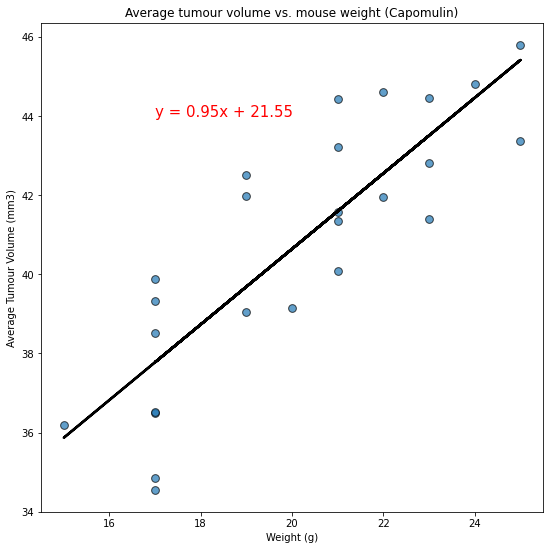

In [21]:
mouse_capomulin = new_Pymaceuticals_data.loc[new_Pymaceuticals_data['Drug Regimen'] == 'Capomulin']

mouse_cap_avg = mouse_capomulin.groupby(['Mouse ID']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = mouse_cap_avg['Weight (g)']
y_values = mouse_cap_avg['Tumour Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(mouse_cap_avg['Weight (g)'],mouse_cap_avg ['Tumour Volume (mm3)'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(mouse_cap_avg['Weight (g)'],mouse_cap_avg ['Tumour Volume (mm3)'], deg=1)
# Plot regression line
ax.plot(mouse_cap_avg['Weight (g)'], a + b * mouse_cap_avg['Weight (g)'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(17,44),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.title("Average tumour volume vs. mouse weight (Capomulin)")

print(f"""The correlation for mouse weight and average tumour volume for the Capomulin regimen is {(correlation)}.""")